# Классификация клиентов банка - прогнозирование оттока

## Постановка задачи
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт ли клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

<i>Примечание</i>: такого банка в реальности не существует. Данные о его клиентах вымышлены (синтезированы).


### В каком виде хранятся исходные данные?

Обычно в задаче анализа данных имеется некоторая прямоугольная таблица. Ее строки соответствуют объектам, а столбцы – признакам этих объектов. Объекты также называются наблюдениями или примерами (samples), а признаки – атрибутами (features).

Признаки бывают количественными (как, например, доход в рублях или рост в сантиметрах и т.д.) или категориальными (как, например, марка автомобиля, модель телефона и т.д.).

Один из признаков (столбцов) выделен. Этот признак называется ответом. Остальные признаки – входные. Требуется по имеющейся таблице научиться по новому объекту, которого нет в таблице, но для которого известны значения входных признаков, по возможности с небольшой ошибкой предсказывать значение выделенного признака (ответа).

Если ответ количественный, то задача называется задачей восстановления регрессии. Если ответ категориальный, то задача называется задачей классификации.

Взято из руководства https://mlbootcamp.ru/ru/article/tutorial/

## Подключение модулей

Для решения задачи анализа данных воспользуемся библиотеками numpy, pandas и scikit-learn. Библиотека numpy содержит реализации многомерных массивов и алгоритмов линейной алгебры. Библиотека pandas предоставляет широкий спектр функций по обработке табличных данных. Библиотека scikit-learn реализует множество алгоритмов машинного обучения. Кроме того, нам понадобится библиотека matplotlib для научной визуализации.


In [19]:
# импортируем необходимые модули
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
%matplotlib inline

## Загрузка данных

In [21]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
dataFile = r"C:\Users\dinislam\Documents\Practick\MO&BD\18.11.2025\Churn_Modelling.csv"
df = pd.read_csv(dataFile, sep=";")

In [22]:
# проверяем, что данные загрузились - выводим первые несколько строк таблицы
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Описание данных

Признаки:
- RowNumber – индекс строки в данных
- CustomerId – уникальный идентификатор клиента
- Surname – фамилия
- CreditScore – кредитный рейтинг
- Geography – страна проживания
- Gender – пол
- Age – возраст
- Tenure – количество недвижимости у клиента
- Balance – баланс на счёте
- NumOfProducts -количество продуктов банка, используемых клиентом
- HasCrCard – наличие кредитной карты
- IsActiveMember – активность клиента
- EstimatedSalary – предполагаемая зарплата

Целевой (искомый) признак:
- Exited – факт ухода клиента

## Стадии решения задачи
- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- обучение моделей (models fitting)
- прогнозирование (prediction)

## Разведочный анализ данных (РАД, EDA)

На какие вопросы может дать ответы РАД?
- сколько у нас данных? (кол-во объектов и их признаков)
- какие типы данных имеют признаки?
- какой признак является целевым (target)? С какой задачей мы имеем дело? (классификация или регрессия)
- сколько значений пропущено в различных колонках?
- какова статистика распределения значений признаков? Есть ли выбросы (аномальные наблюдения)?
- как признаки соотносятся между собой (коррелируют, влияют друг на друга)? Как признаки влияют на целевой признак?
- для задач классификации: сколько у нас классов - два или больше? Сбалансированы ли классы?
- и др.

В зависимости от формы представления результатов РАД можно разделить на:
- числовой/табличный анализ
- визуальный (графический) анализ

В зависимости от кол-ва одновременно исследуемых признаков РАД можно разделить на:
- одномерный анализ (univariate analysis) - исследование каждого признака в отдельности
- двумерный анализ (bivariate analysis) - исследование взаимного влияния признаков и сравнение их характеристик
- многомерный анализ (multivariate analysis) - сравнение статистических характеристик нескольких признаков 

In [23]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(10000, 14)

In [24]:
# выводим типы данных
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [25]:
# целевой признак - Exited

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
# имена колонок в виде списка
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [28]:
# сколько пропусков в колонке CreditScore ?
df['CreditScore'].isna().sum()

np.int64(0)

In [29]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке RowNumber = 0
Кол-во пропусков в колонке CustomerId = 0
Кол-во пропусков в колонке Surname = 0
Кол-во пропусков в колонке CreditScore = 0
Кол-во пропусков в колонке Geography = 0
Кол-во пропусков в колонке Gender = 0
Кол-во пропусков в колонке Age = 0
Кол-во пропусков в колонке Tenure = 0
Кол-во пропусков в колонке Balance = 0
Кол-во пропусков в колонке NumOfProducts = 0
Кол-во пропусков в колонке HasCrCard = 0
Кол-во пропусков в колонке IsActiveMember = 0
Кол-во пропусков в колонке EstimatedSalary = 0
Кол-во пропусков в колонке Exited = 0


In [30]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [31]:
# сколько уникальных значений в колонке Geography? 
df['Geography'].nunique()

3

In [32]:
# Какие это значения?
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [33]:
# какова статистика распределения этих значений? (сколько каких значений)
df['Geography'].value_counts(normalize=True)

Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64

In [34]:
# исследование целевого (target) признака - факта ухода клиента 
print('кол-во уникальных значений в таргете: ', df['Exited'].nunique())
print('перечень уникальных значений в таргете: ', df['Exited'].unique())
print('статистика распределения значений в таргете: \n', df['Exited'].value_counts(normalize=True))

кол-во уникальных значений в таргете:  2
перечень уникальных значений в таргете:  [1 0]
статистика распределения значений в таргете: 
 Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [35]:
# описательная статистика для признака Age
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [36]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [37]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [38]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0000,5000.5000,2886.8957,1.0000,2500.7500,5000.5000,7500.2500,10000.0000
CustomerId,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800


### Визуальный анализ

In [39]:
df['Exited'].value_counts(normalize=False).plot.bar()

<Axes: xlabel='Exited'>

In [40]:
df['Geography'].value_counts(normalize=True).plot.pie()

<Axes: xlabel='Exited', ylabel='proportion'>

In [41]:
df['Age'].nunique()

70

In [42]:
df['Age'].value_counts(normalize=True).plot.barh()

<Axes: ylabel='Age'>

In [43]:
# гистаграммы всех признаков
df.hist(figsize=(20,20));

In [44]:
# гистаграмма для 1 признака
df['Age'].hist()

<Axes: >

In [45]:
# "ящик с усами" (boxplot) для визуализации распределения вероятностей значений признака
df['Age'].plot.box()

<Axes: >

In [46]:
# график плотности распределения признака
df['Age'].plot.density()

<Axes: ylabel='Density'>

In [47]:
# применяем тему со светлыми линиями сетки
sns.set_theme(style="whitegrid")

# строим диаграмму violin plot ("скрипичная диаграмма")
sns.violinplot(y=df["Age"], inner="quartile")

<Axes: ylabel='Density'>

### Двумерный анализ признаков

In [48]:
# список признаков для анализа
features_eda = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_num']

In [49]:
# создание новой колонки Geography_num и замена символьных значений на целочисленные
df['Geography_num'] = df['Geography']

d = {'France':0, 'Spain':1, 'Germany':2}
df['Geography_num'] = df['Geography_num'].map(d)

In [50]:
df['Gender']= df['Gender'].map({'Male':0, 'Female':1})

In [51]:
df['Gender'].unique()

array([1, 0])

In [52]:
# матрица коррелаций
corr = df[features_eda].corr()
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
CreditScore,1.0000,0.0029,-0.0040,0.0008,0.0063,0.0122,-0.0055,0.0257,-0.0014,-0.0271,0.0083
Gender,0.0029,1.0000,0.0275,-0.0147,-0.0121,0.0219,-0.0058,-0.0225,0.0081,0.1065,0.0169
Age,-0.0040,0.0275,1.0000,-0.0100,0.0283,-0.0307,-0.0117,0.0855,-0.0072,0.2853,0.0481
Tenure,0.0008,-0.0147,-0.0100,1.0000,-0.0123,0.0134,0.0226,-0.0284,0.0078,-0.0140,0.0014
Balance,0.0063,-0.0121,0.0283,-0.0123,1.0000,-0.3042,-0.0149,-0.0101,0.0128,0.1185,0.3487
NumOfProducts,0.0122,0.0219,-0.0307,0.0134,-0.3042,1.0000,0.0032,0.0096,0.0142,-0.0478,-0.0062
HasCrCard,-0.0055,-0.0058,-0.0117,0.0226,-0.0149,0.0032,1.0000,-0.0119,-0.0099,-0.0071,0.0040
IsActiveMember,0.0257,-0.0225,0.0855,-0.0284,-0.0101,0.0096,-0.0119,1.0000,-0.0114,-0.1561,-0.0127
EstimatedSalary,-0.0014,0.0081,-0.0072,0.0078,0.0128,0.0142,-0.0099,-0.0114,1.0000,0.0121,0.0074
Exited,-0.0271,0.1065,0.2853,-0.0140,0.1185,-0.0478,-0.0071,-0.1561,0.0121,1.0000,0.1538


In [53]:
# тепловая карта корреляций между признаками

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

<Axes: >

In [54]:
# диаграмма рассеяния для 2х признаков
plt.scatter(df['CreditScore'], df['EstimatedSalary'])

In [55]:
# диаграмма рассеяния для 2х признаков средствами библиотеки seaborn 
sns.scatterplot(data=df, x="CreditScore", y="EstimatedSalary")

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

In [56]:
# цвета точек зависят от класса объекта (ушёл клиент или нет)
sns.scatterplot(data=df, x="CreditScore", y="EstimatedSalary", hue="Exited") # , style="Exited"

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

In [57]:
sns.scatterplot(data=df, x="NumOfProducts", y="Balance", hue="Exited") # Exited IsActiveMember HasCrCard 

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

In [58]:
sns.scatterplot(data=df, x="Exited", y="Age", hue="Gender")

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

In [59]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x="Geography_num", y="Balance", hue="Exited")

<Axes: xlabel='Geography_num', ylabel='Balance'>

In [60]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[features_eda], alpha=0.05, figsize=(20, 20));

In [61]:
sns.pairplot(df[features_eda])

In [62]:
# два бокс-плота на одном графике - построение с помощью matplotlib
my_dict = {'EstimatedSalary': df['EstimatedSalary'], 'Balance': df['Balance']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

[Text(1, 0, 'EstimatedSalary'), Text(2, 0, 'Balance')]

In [63]:
sns.boxplot(data=df, y="EstimatedSalary", x="NumOfProducts", hue="Exited")

<Axes: xlabel='NumOfProducts', ylabel='EstimatedSalary'>

In [64]:
sns.violinplot(data=df, y="Balance", x="NumOfProducts")

<Axes: xlabel='NumOfProducts', ylabel='EstimatedSalary'>

In [65]:
# средний баланс в разрезе кол-ва продуктов
df.groupby('NumOfProducts')['Balance'].mean()

NumOfProducts
1   98551.8706
2   51879.1458
3   75458.3282
4   93733.1350
Name: Balance, dtype: float64

In [66]:
df.groupby('NumOfProducts')['Balance'].mean().plot.bar()

<Axes: xlabel='NumOfProducts', ylabel='EstimatedSalary'>

### Многомерный анализ признаков

In [ ]:
# сводная таблица - средний баланс в разрезе стран и кол-ва продуктов
result = pd.pivot_table(data=df, index='Geography', columns='NumOfProducts', values='Balance')
result8

NumOfProducts,1,2,3,4
Geography,,,,
France,90977.8779,31828.0970,50071.8225,71362.7314
Germany,119868.3281,119341.2450,121572.6724,121442.3054
Spain,90595.3731,32690.8527,48385.8971,91407.6514


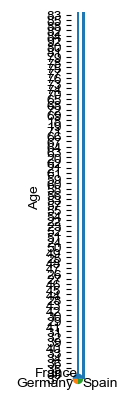

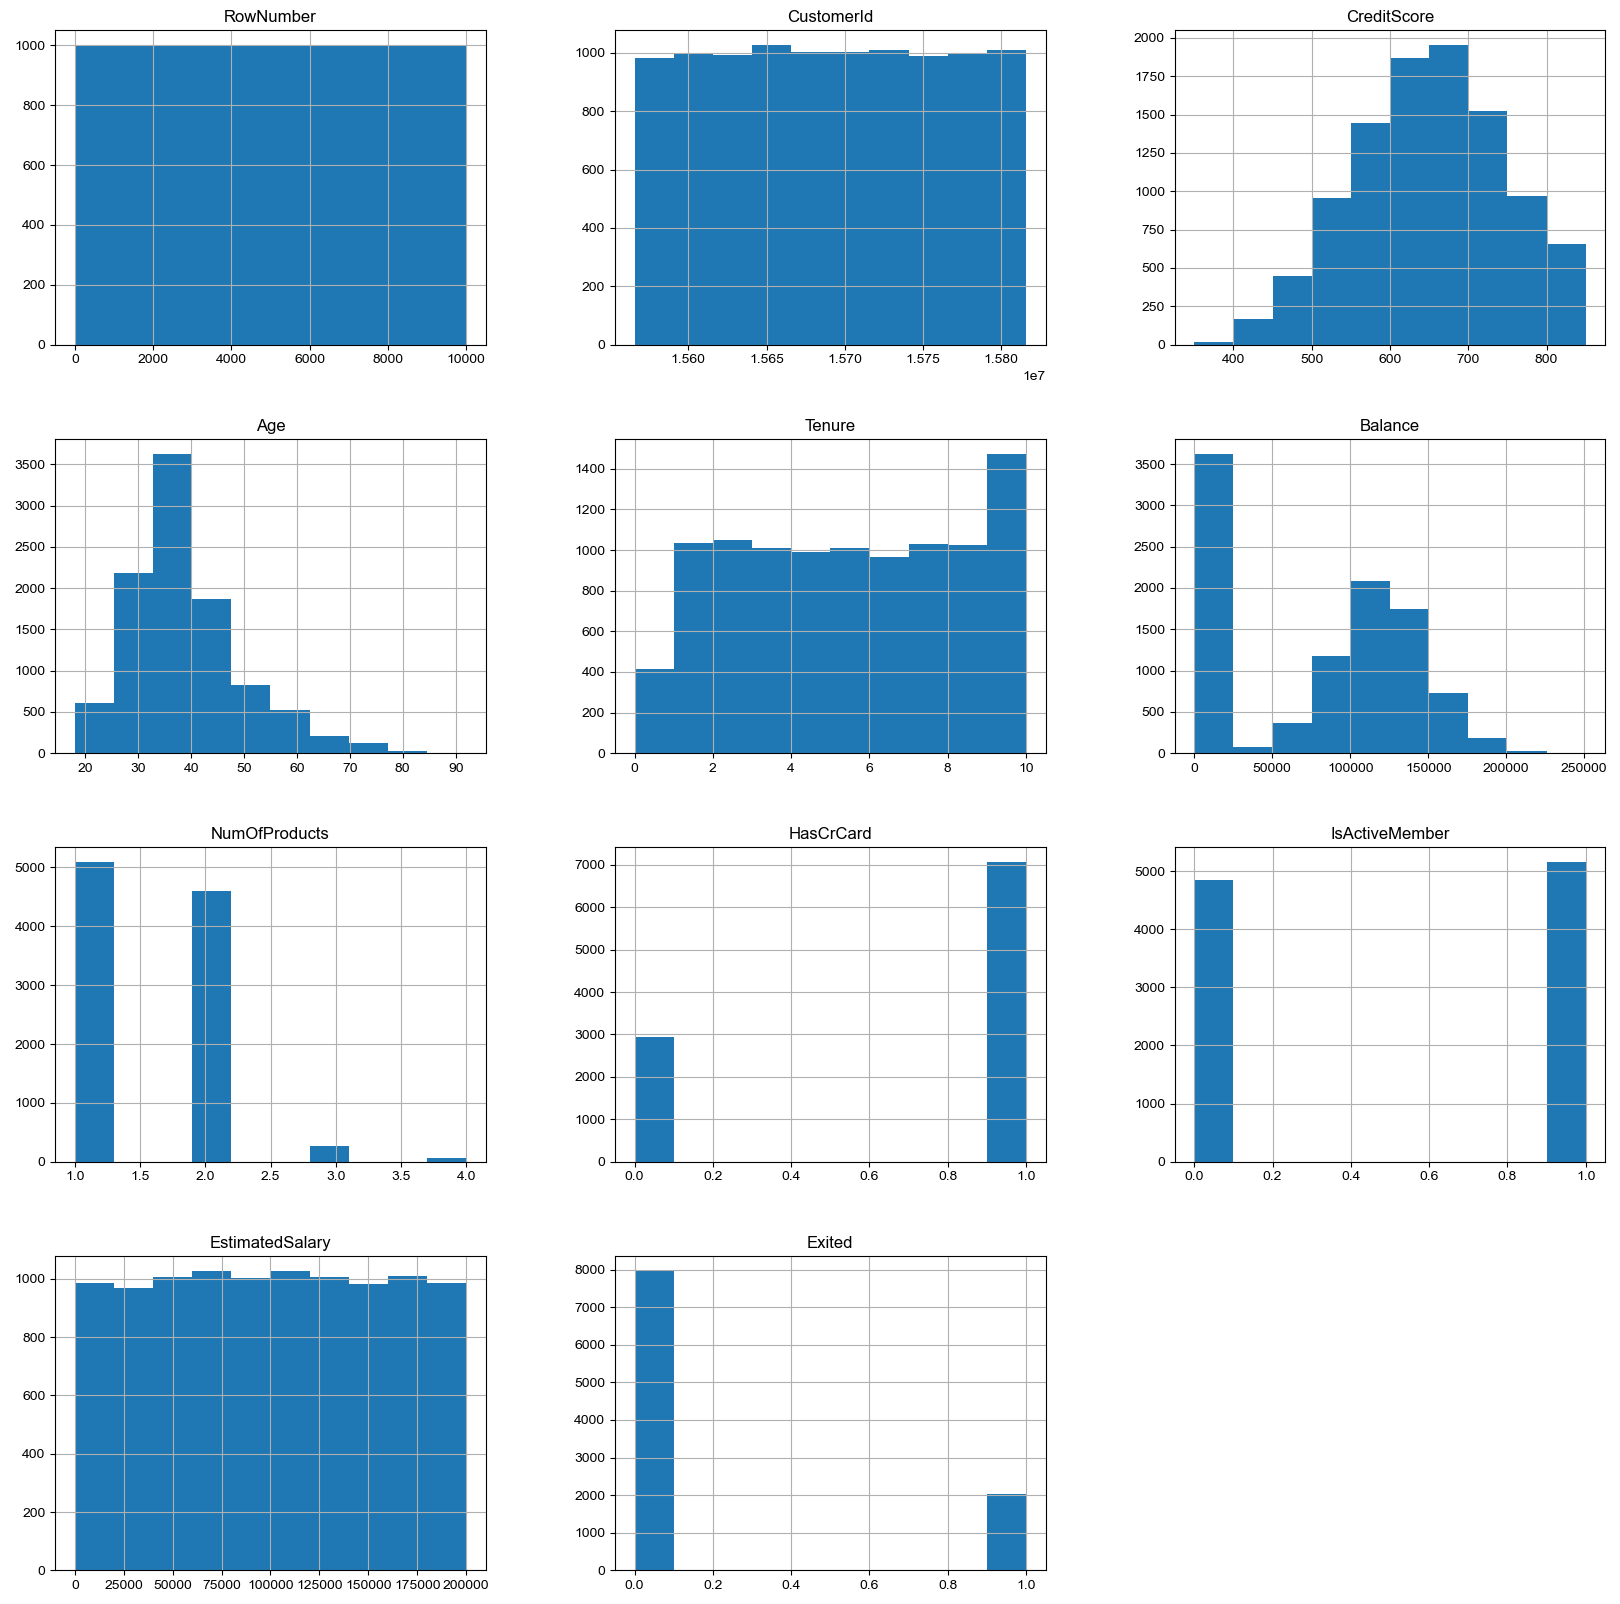

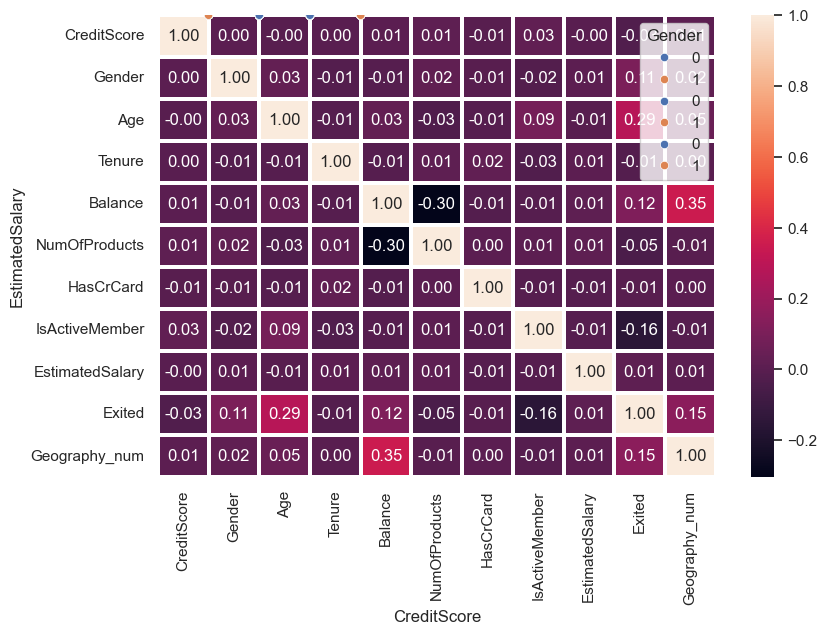

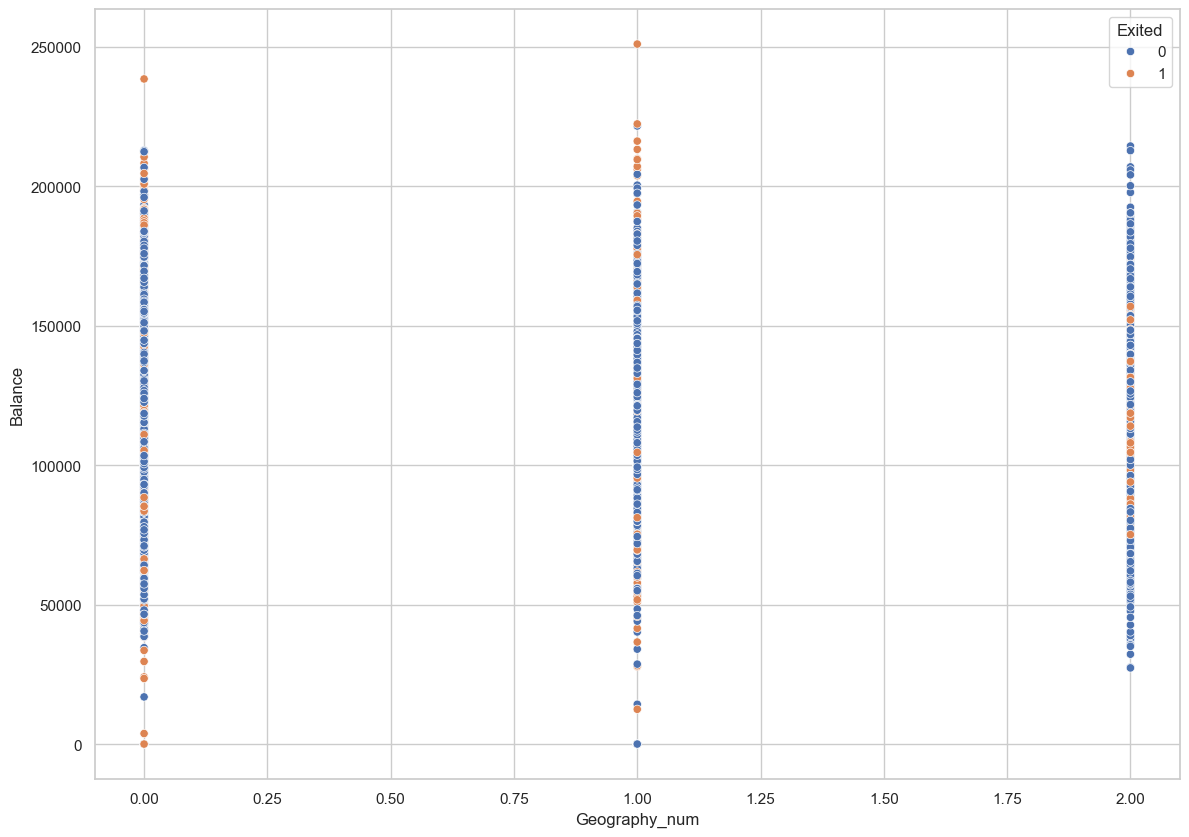

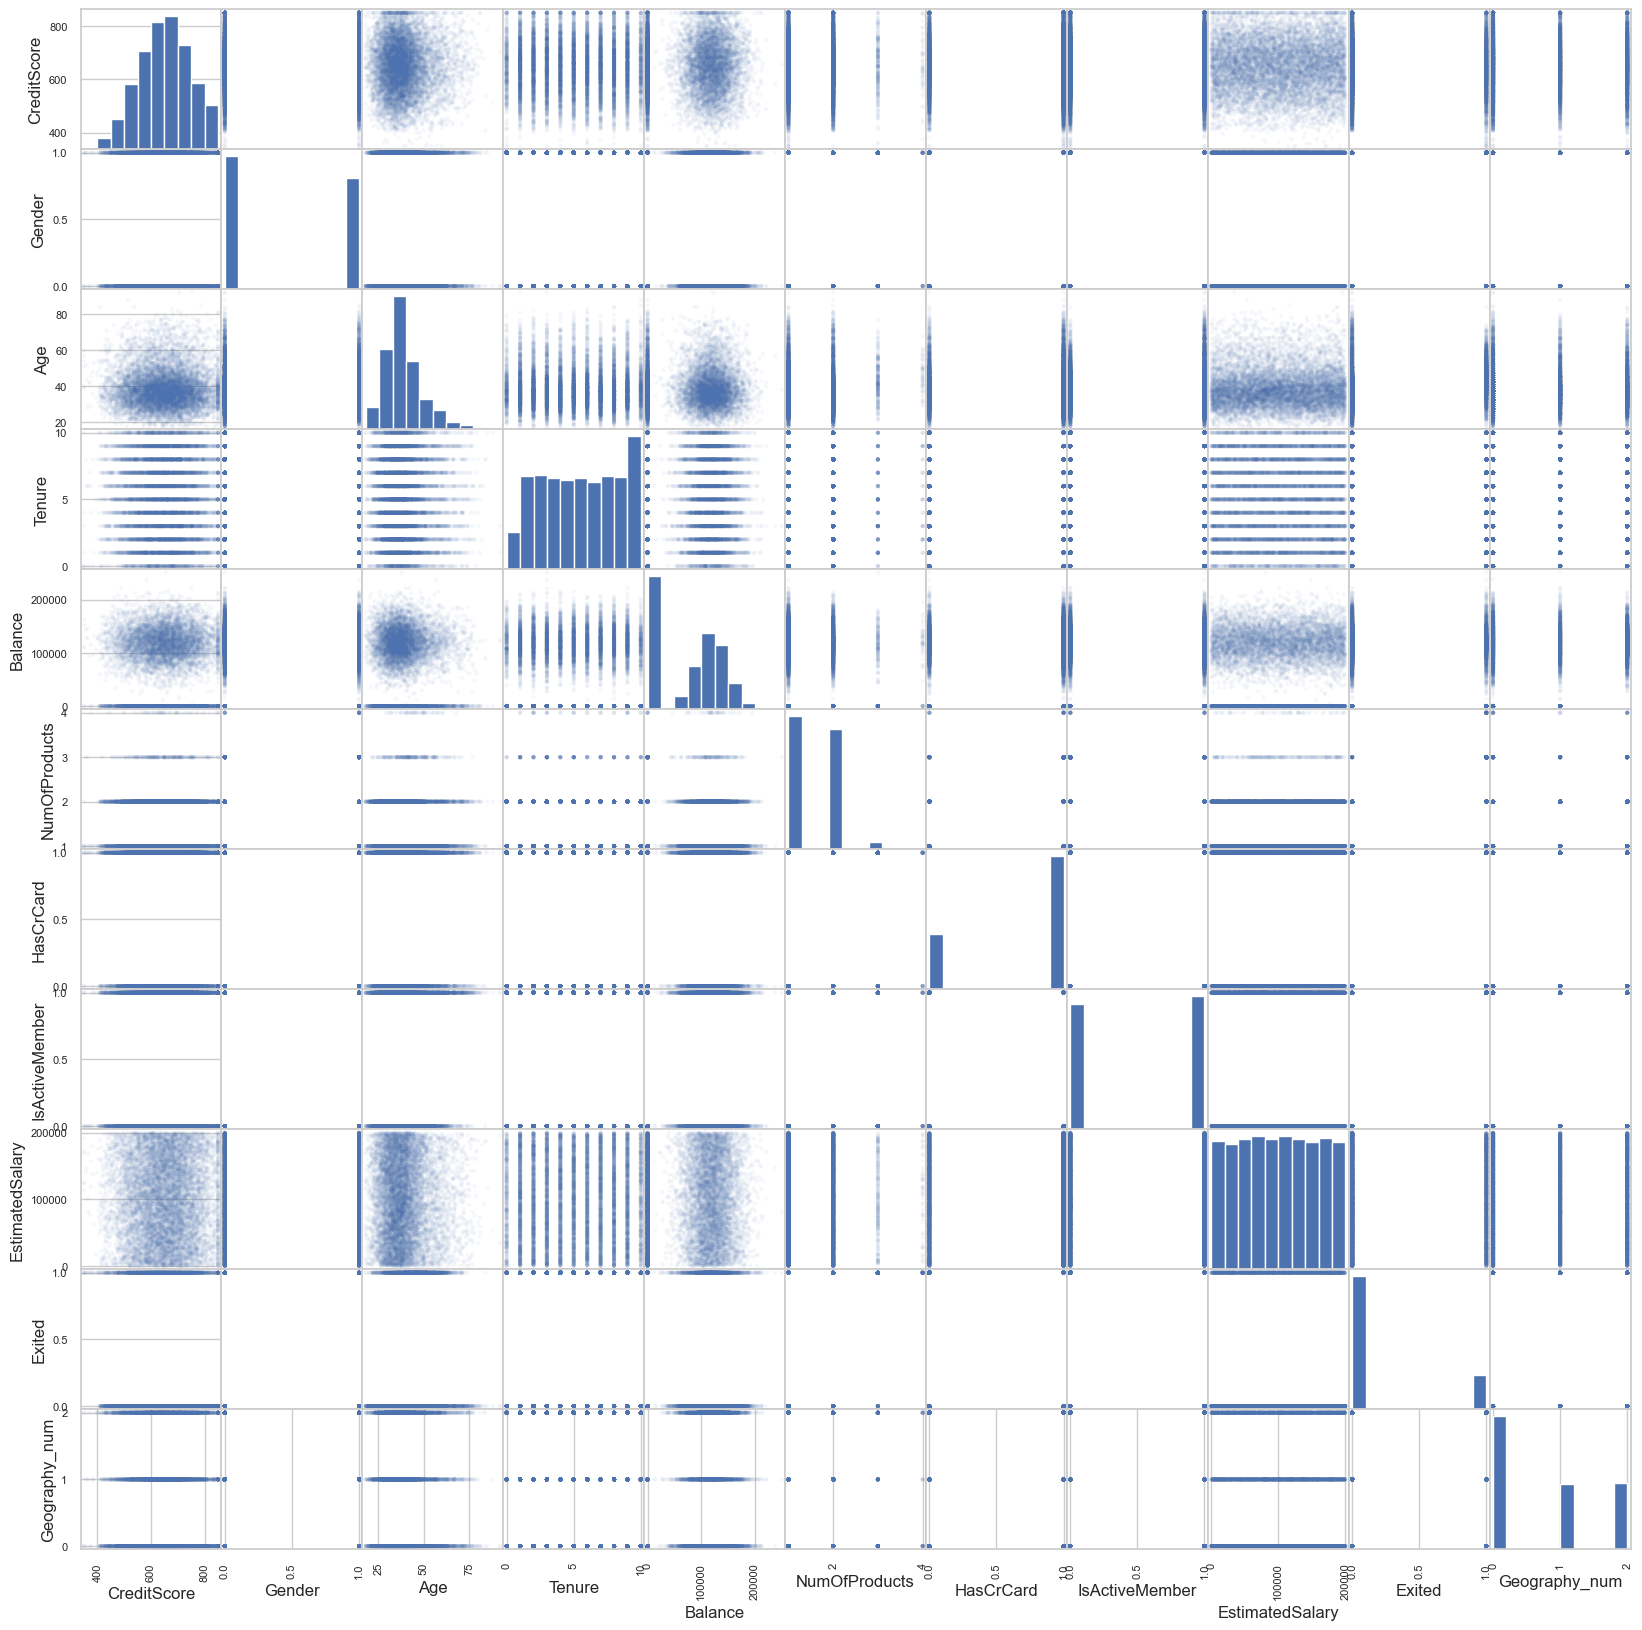

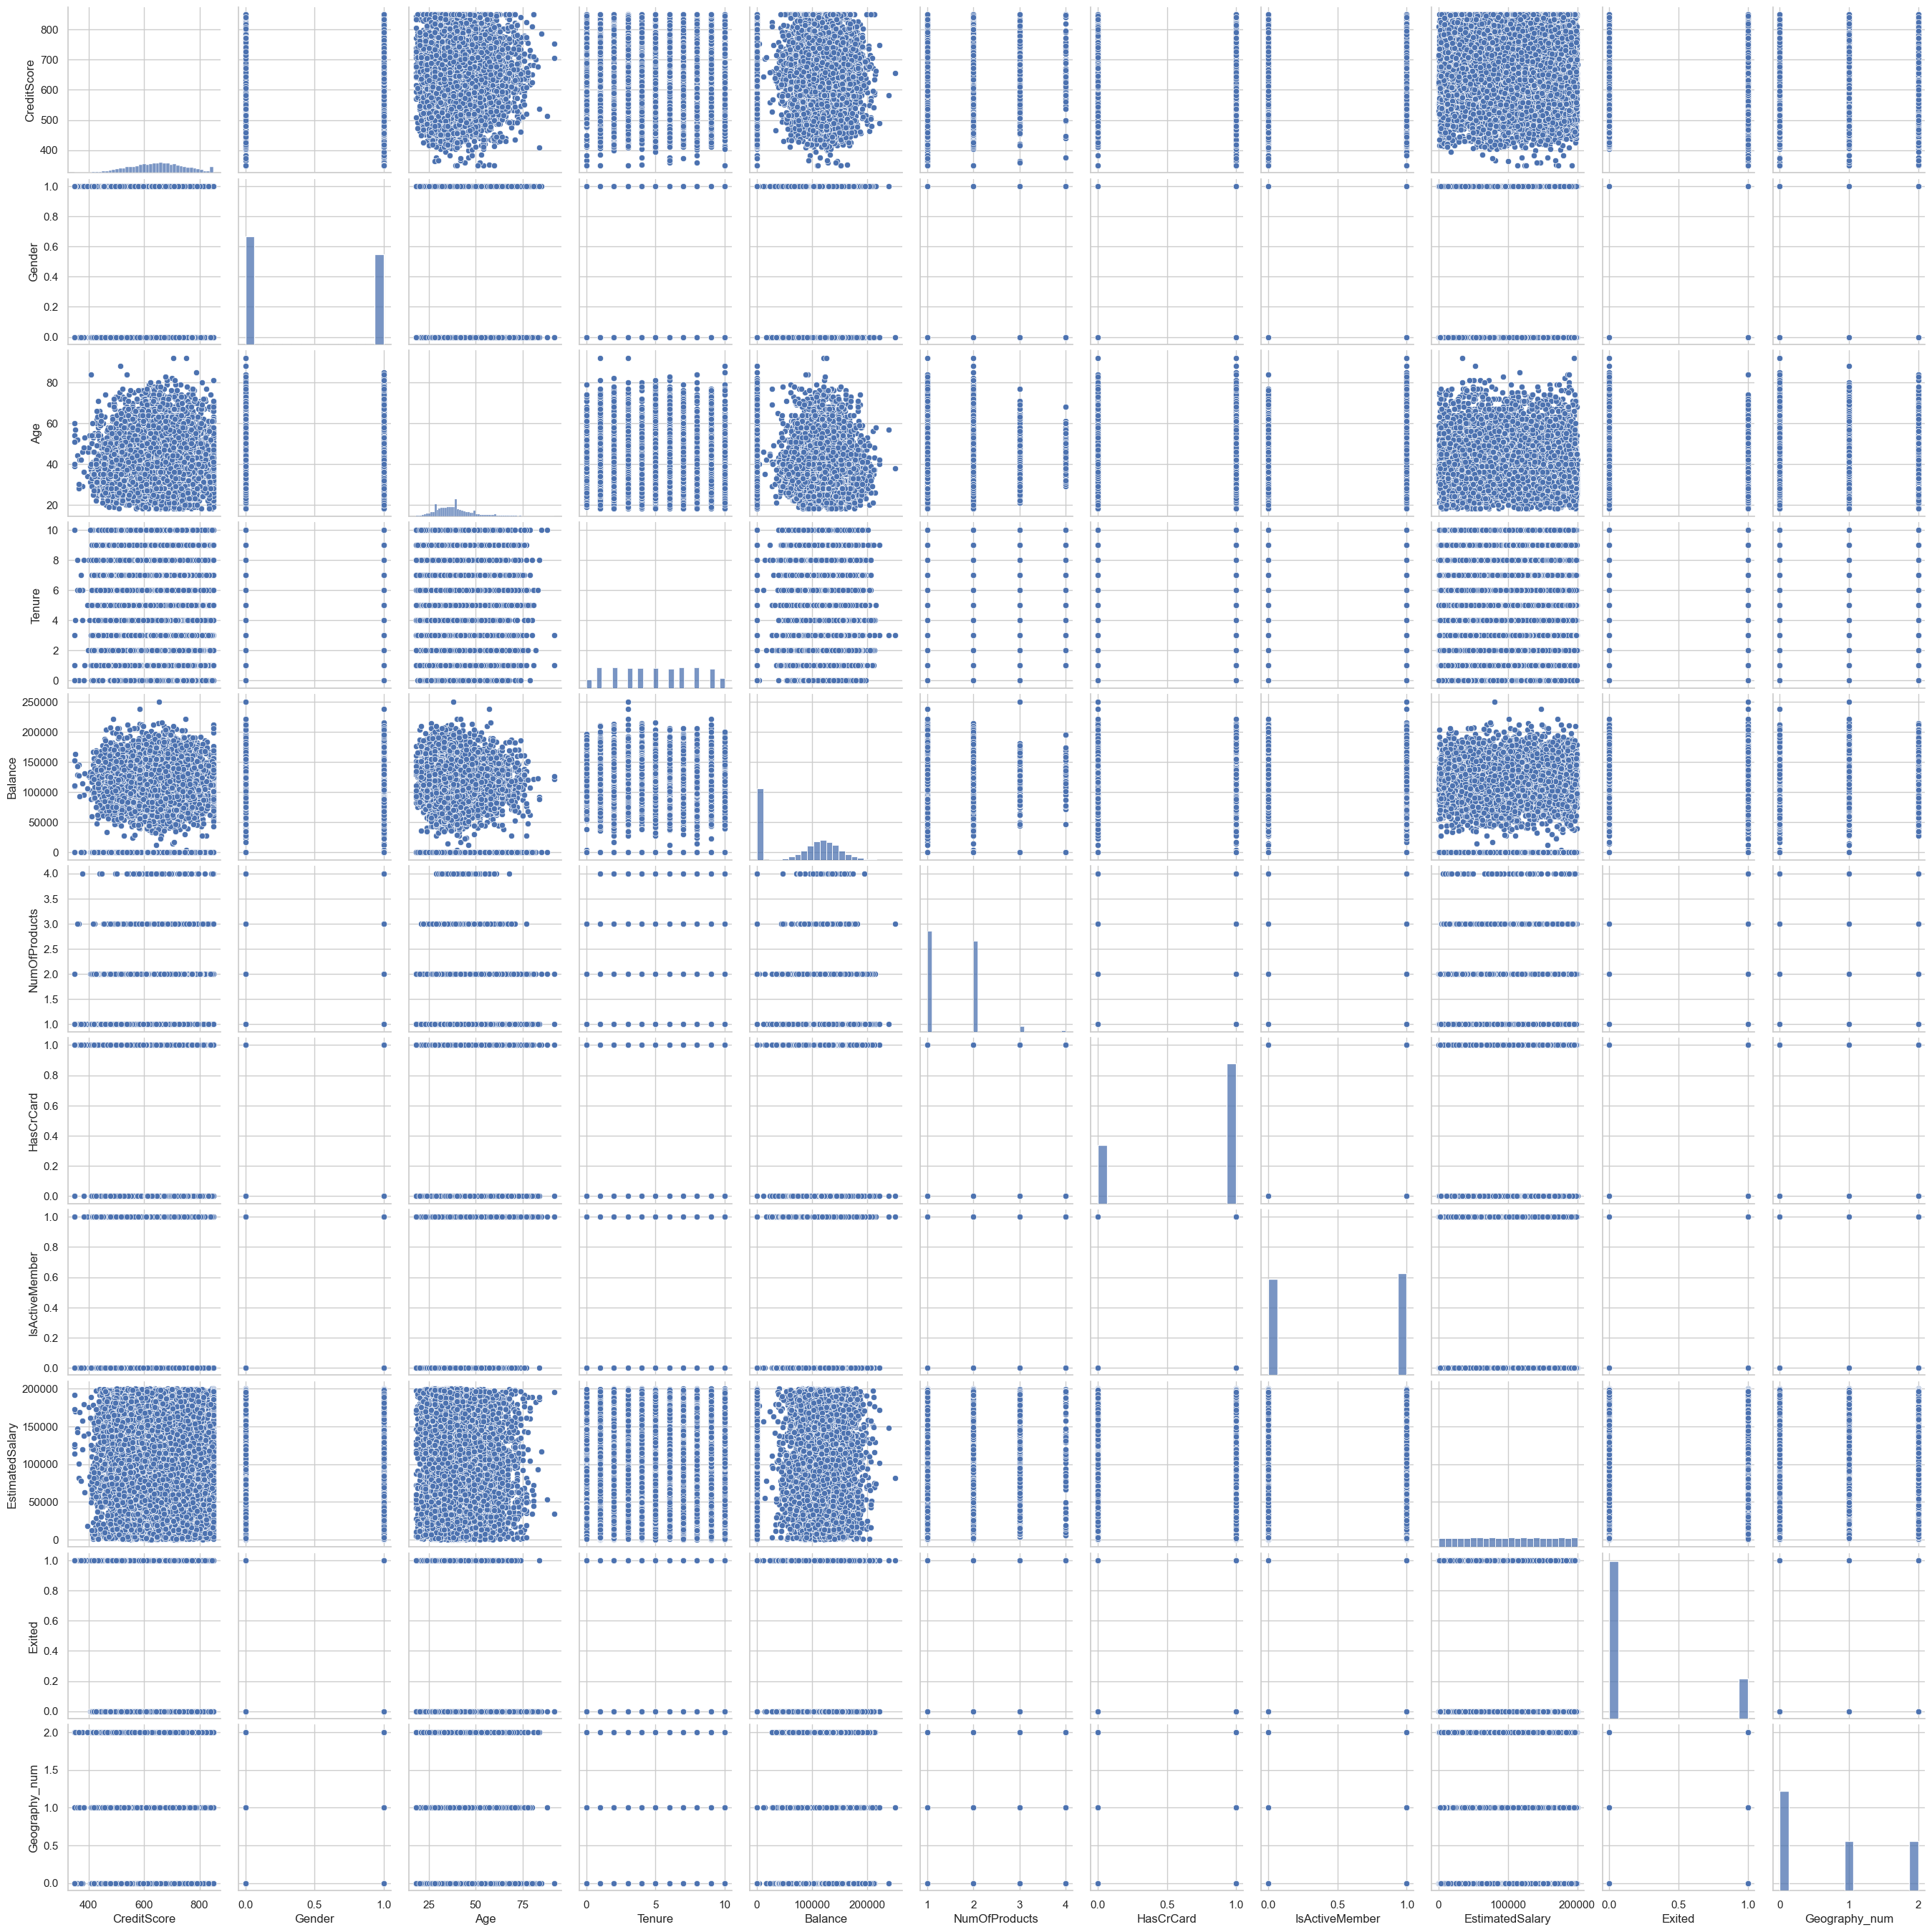

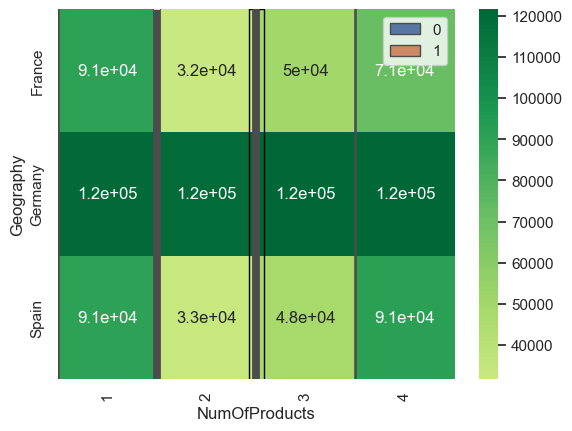

In [ ]:
# тепловая карта баланса в разрезе стран и кол-ва продуктов
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()          

## Предварительная обработка данных (preprocessing)

Какие действия выполняются в процессе предварительной подготовки?
- преобразование типов данных (в т.ч. преобразование категориальных признаков в набор фиктивных бинарных признаков)
- удаление выбросов
- заполнение пропусков
- нормализация (масштабирование) числовых признаков
- формирование дата-сета для обучения моделей (исключение признаков, объединение с фиктивными признаками и др.)

### Преобразование типов

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Geography_num    10000 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 1.1+ MB


In [70]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,1,15634602,Hargrave,619,France,1,42,2,0.0000,1,1,1,101348.8800,1,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.8600,1,0,1,112542.5800,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.8000,3,1,0,113931.5700,1,0
3,4,15701354,Boni,699,France,1,39,1,0.0000,2,0,0,93826.6300,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.8200,1,1,1,79084.1000,0,1
5,6,15574012,Chu,645,Spain,0,44,8,113755.7800,2,1,0,149756.7100,1,1
6,7,15592531,Bartlett,822,France,0,50,7,0.0000,2,1,1,10062.8000,0,0
7,8,15656148,Obinna,376,Germany,1,29,4,115046.7400,4,1,0,119346.8800,1,2
8,9,15792365,He,501,France,0,44,4,142051.0700,2,0,1,74940.5000,0,0
9,10,15592389,H?,684,France,0,27,2,134603.8800,1,1,1,71725.7300,0,0


### Выявление выбросов

In [71]:
numeric_columns = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']

In [72]:
df[numeric_columns].describe()

,CreditScore,Balance,EstimatedSalary,Age
count,10000.0000,10000.0000,10000.0000,10000.0000
mean,650.5288,76485.8893,100090.2399,38.9218
std,96.6533,62397.4052,57510.4928,10.4878
min,350.0000,0.0000,11.5800,18.0000
25%,584.0000,0.0000,51002.1100,32.0000
50%,652.0000,97198.5400,100193.9150,37.0000
75%,718.0000,127644.2400,149388.2475,44.0000
max,850.0000,250898.0900,199992.4800,92.0000


### Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [73]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
geography_cols = pd.get_dummies(df["Geography"], dtype=int)
geography_cols.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


### Формирование дата-сета для обучения моделей

In [74]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']

In [75]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names], geography_cols], axis = 1)
X.shape

(10000, 12)

In [76]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.0000,1,1,1,101348.8800,1,0,0
1,608,1,41,1,83807.8600,1,0,1,112542.5800,0,0,1
2,502,1,42,8,159660.8000,3,1,0,113931.5700,1,0,0
3,699,1,39,1,0.0000,2,0,0,93826.6300,1,0,0
4,850,1,43,2,125510.8200,1,1,1,79084.1000,0,0,1


In [77]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Exited']

In [78]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### Modelling

In [79]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6700, 12) (3300, 12) (6700,) (3300,)


In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### KNeighborsClassifier (Классификация ближайших соседей)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 34.3 ms


KNeighborsClassifier()

In [84]:
# making prediction
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [86]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.815820895522388
test accuracy:  0.769090909090909


In [87]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)
knn_accuracy

0.769090909090909

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 31.2 ms
Wall time: 12.5 ms


GaussianNB()

In [90]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [91]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.793939393939394

In [92]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

### Random Forest Classifier (Классификатор дерева решений)

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 1.2 s
Wall time: 635 ms


In [95]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [96]:
# performance measurement
from sklearn.metrics import accuracy_score


In [97]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

### Logistic Regression (Логистическая регрессия)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 30.4 ms


LogisticRegression(random_state=42)

In [101]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [102]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred_test)

0.8115151515151515

In [103]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

## Метрики классификации

In [104]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [105]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]


In [106]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.7691
1,Gaussian Naive Bayes,0.7939
2,Random Forest Classifier,0.8712
3,Logistic Regression,0.8115


In [107]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

Для оценки качества моделей классификации в машинном обучении используют __метрики классификации.__

### Confusion matrix (матрица ошибок)

Матрица ошибок показывает, сколько объектов из каждого класса модель отнесла к каждому из классов. По ней можно посчитать количество верных и ошибочных предсказаний:


__True Positives (TP)__ - верно классифицированные положительные примеры

__True Negatives (TN)__ - верно классифицированные отрицательные примеры

__False Positives (FP)__ - отрицательные примеры, ошибочно отнесенные к положительному классу

__False Negatives (FN)__ - положительные примеры, ошибочно отнесенные к отрицательному классу
лассу

In [108]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

C:\Users\dinislam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\dinislam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


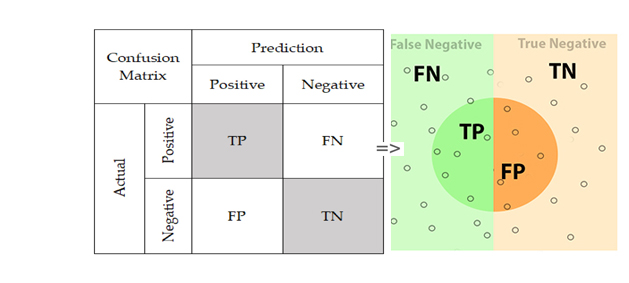

***Пояснение*** 

Класс, который представляет для нас интерес, называется «положительным», а оставшийся — «отрицательным».

Для каждого объекта в выборке возможно 4 ситуации:

* предсказали положительную метку и угадали. Будет относить такие объекты к __true positive (TP)__ группе. True — потому что предсказали правильно, а positive — потому что предсказали положительную метку;

* предсказали положительную метку, но ошиблись в своём предсказании — __false positive (FP)__. False, потому что предсказание было неправильным;

* предсказали отрицательную метку и угадали — __true negative (TN)__;

* предсказали отрицательную метку, но ошиблись — __false negative (FN)__.

Для удобства все эти 4 числа изображают в виде таблицы, которую называют __confusion matrix (матрицей ошибок)__.


Поскольку с точки зрения логики задачи нам важнее правильно распознать некредитоспособного заёмщика с меткой y=1, чем ошибиться в распознавании кредитоспособного, будем называть соответствующий исход классификации положительным (заёмщик некредитоспособен), а противоположный - отрицательным (заемщик кредитоспособен y=0). 

Тогда возможны следующие исходы классификации:

* Некредитоспособный заёмщик классифицирован как некредитоспособный, т.е. положительный класс распознан как положительный. Наблюдения, для которых это имеет место называются истинно-положительными (True Positive — TP).

* Кредитоспособный заёмщик классифицирован как кредитоспособный, т.е. отрицательный класс распознан как отрицательный. Наблюдения, которых это имеет место, называются истинно отрицательными (True Negative — TN).

* Кредитоспособный заёмщик классифицирован как некредитоспособный, т.е. имела место ошибка, в результате которой отрицательный класс был распознан как положительный. Наблюдения, для которых был получен такой исход классификации, называются ложно-положительными (False Positive — FP), а ошибка классификации называется ошибкой I рода.

* Некредитоспособный заёмщик распознан как кредитоспособный, т.е. имела место ошибка, в результате которой положительный класс был распознан как отрицательный. Наблюдения, для которых был получен такой исход классификации, называются ложно-отрицательными (False Negative — FN), а ошибка классификации называется ошибкой II рода.

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [110]:
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[2657,    0],
       [ 643,    0]])

#### Визуализация confusion matrix

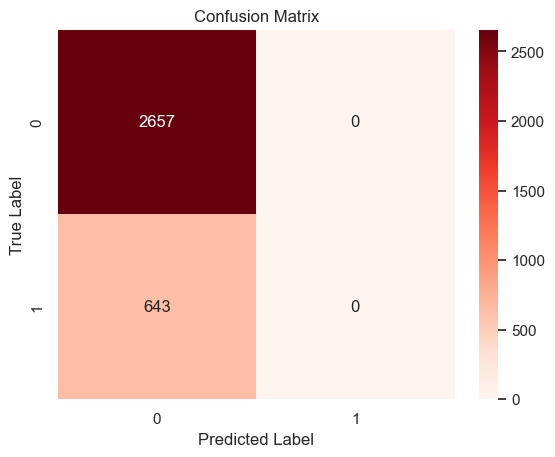

In [111]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

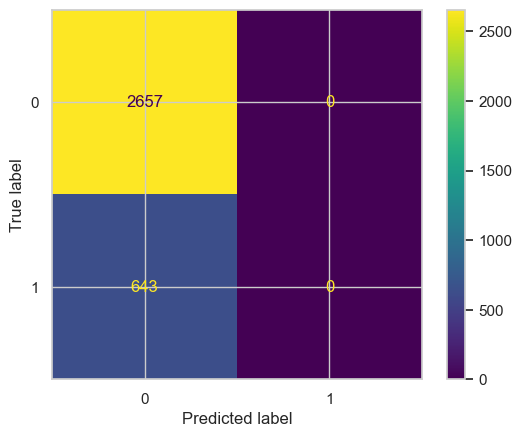

In [112]:
cm = confusion_matrix(y_test, y_test_predict, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

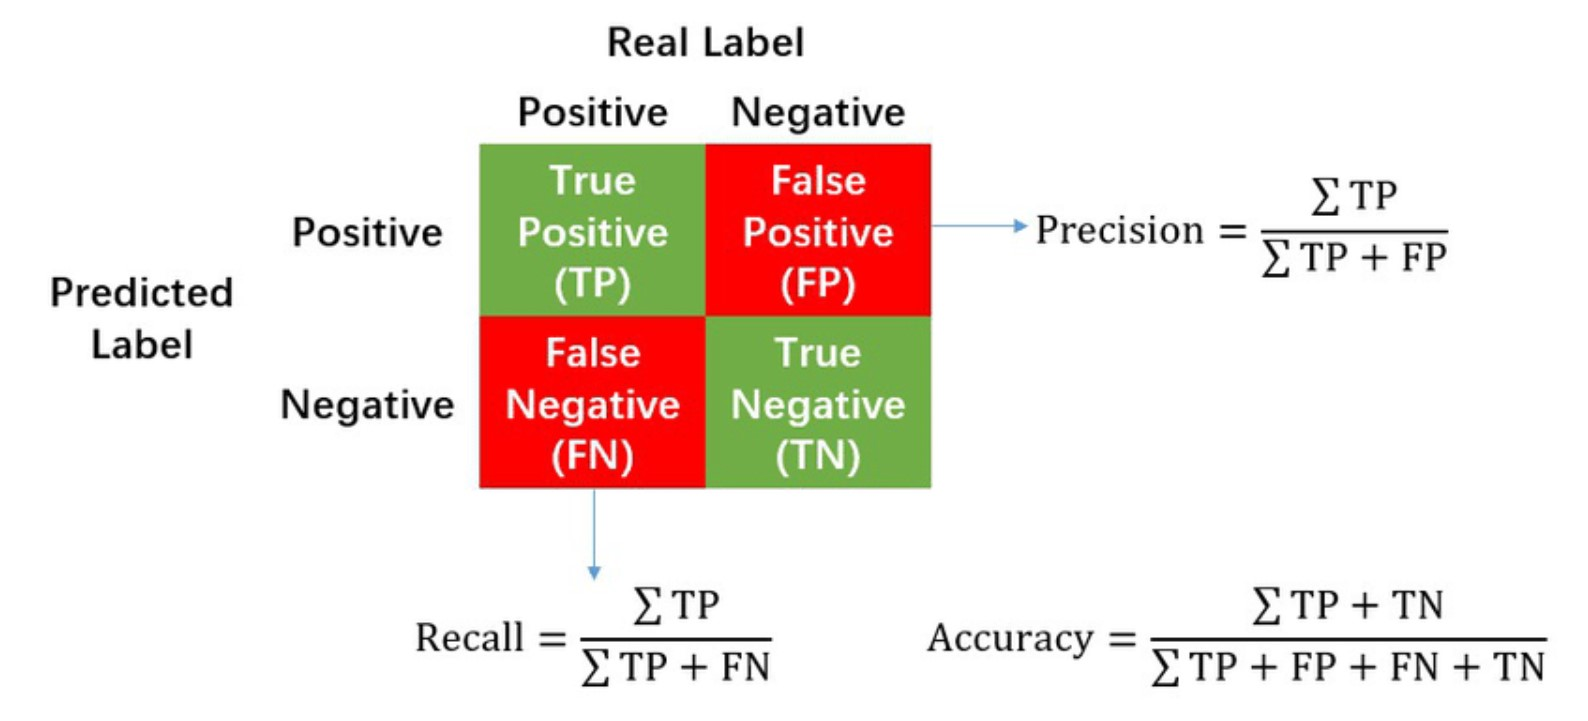

### Accuracy (Точность)

__Точность__ — это доля правильно классифицированных объектов среди всех объектов. Эта метрика является одной из самых простых и интуитивно понятных, однако она может быть не всегда полезна, особенно в случае несбалансированных классов. Например, если у вас есть 90% примеров одного класса и 10% другого, модель, которая всегда предсказывает более частый класс, будет иметь высокую точность, но низкую полезность.

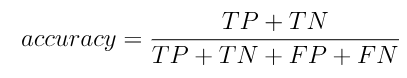

In [113]:
print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.7919402985074627
test accuracy:  0.8051515151515152


Сопряженная ей метрика — **доля ошибочных классификаций (error rate)**: Error rate=1−Accuracy

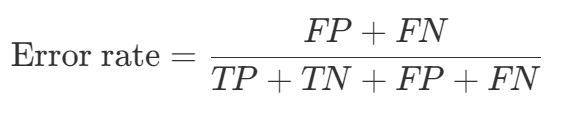

In [114]:
print('test mean_squared_error: ', mean_squared_error(y_test, y_test_predict))
print('test mean_absolute_error: ', mean_absolute_error(y_test, y_test_predict))

test mean_squared_error:  0.19484848484848485
test mean_absolute_error:  0.19484848484848485


### Precision (точность) 

__Precision (точность)__ показывает, какая доля объектов, отнесенных моделью к некоторому классу, действительно принадлежит этому классу.

Precision показывает, какая доля предсказанных положительных примеров действительно является положительными. Это важно в задачах, где ложноположительные ошибки могут быть дорогостоящими, например, в медицинской диагностике.

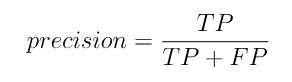

In [115]:
print('test precision_score: ', precision_score(y_test, y_test_predict))

test precision_score:  0.0


C:\Users\dinislam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Recall (полнота)

**Recall (полнота)** показывает, какую долю объектов некоторого класса из всех объектов этого класса нашла модель.

Recall измеряет, какую долю реальных положительных примеров модель смогла правильно предсказать. Это важно в задачах, где пропуск положительных примеров может быть критичным, например, в обнаружении мошенничества.

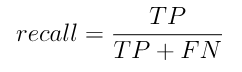

In [116]:
print('test recall_score: ', recall_score(y_test, y_test_predict))

test recall_score:  0.0


In [117]:
recall_score(y_test, y_test_predict)

0.0

Метрика precision показывает долю релевантных документов среди всех найденных классификатором. Чем меньше ложноположительных срабатываний будет допускать модель, тем больше будет её precision.

Метрика recall показывает долю найденных документов из всех релевантных. Чем меньше ложно отрицательных срабатываний, тем выше recall модели.

Например, в задаче предсказания злокачественности опухоли точность показывает, сколько из определённых нами как злокачественные опухолей действительно злокачественные, а полнота — какую долю злокачественных опухолей нам удалось выявить.

Хорошее понимание происходящего даёт следующая картинка:
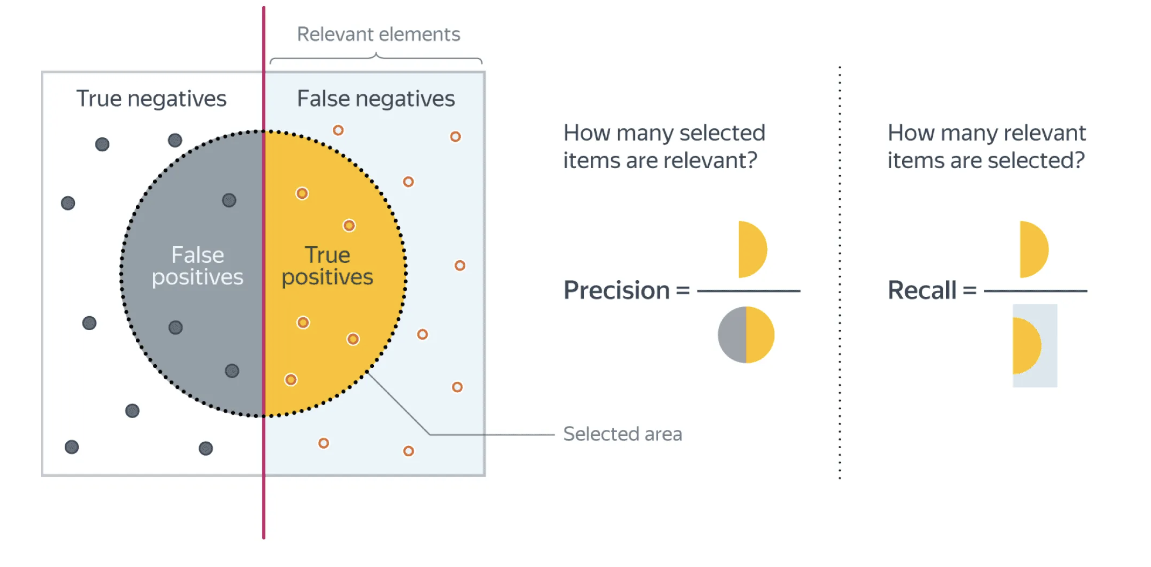

### F1-score

**F1-score** - это гармоническое среднее между precision и recall. Она учитывает оба этих параметра и находит некоторый баланс между ними.

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок. Часто в реальной практике стоит задача найти оптимальный (для заказчика) баланс между этими двумя метриками. Понятно что чем выше точность и полнота, тем лучше. Но в реальной жизни максимальная точность и полнота не достижимы одновременно и приходится искать некий баланс. Поэтому, хотелось бы иметь некую метрику которая объединяла бы в себе информацию о точности и полноте нашего алгоритма. В этом случае нам будет проще принимать решение о том какую реализацию запускать в производство (у кого больше тот и круче). Именно такой метрикой является F-мера.

F-мера представляет собой гармоническое среднее между точностью и полнот, о гармоническое среднее между Precision и RecallОна стремится к нулю, если точность или полнота стремится к нулю. . Используется, когда важно учитывать как ложноположительные, так и ложноотрицательные ошибки. F1-Score особенно полезен в задачах с несбалансированными классами, где простая точность может быть вводящей в заблуждени

F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.е.

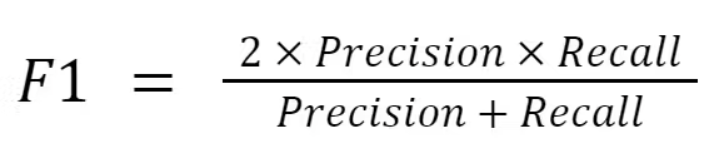

In [118]:
print('test f1_score: ', f1_score(y_test, y_test_predict))

test f1_score:  0.0


### Полная информация

In [119]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2657
           1       0.00      0.00      0.00       643

    accuracy                           0.81      3300
   macro avg       0.40      0.50      0.45      3300
weighted avg       0.65      0.81      0.72      3300



C:\Users\dinislam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dinislam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dinislam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ROC-кривая
Кривая рабочих характеристик (англ. Receiver Operating Characteristics curve). Используется для анализа поведения классификаторов при различных пороговых значениях. Позволяет рассмотреть все пороговые значения для данного классификатора. Показывает долю ложно положительных примеров (англ. false positive rate, FPR) в сравнении с долей истинно положительных примеров (англ. true positive rate, TPR).

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR):

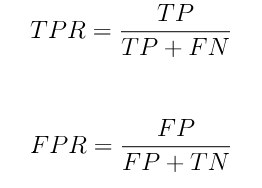

TPR нам уже известна, это полнота, а FPR показывает, какую долю из объектов negative класса алгоритм предсказал неверно. В идеальном случае, когда классификатор не делает ошибок (FPR = 0, TPR = 1) мы получим площадь под кривой, равную единице; в противном случае, когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP.

Каждая точка на графике соответствует выбору некоторого порога. Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, а значит, наша кривая в идеале должна стремиться к точке (0,1).

**Специфичность классификатора** — это доля истинноотрицательных (True Negative Rate — TNR) классификаций в общем числе отрицательных классификаций:

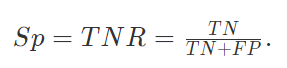

TNR показывает, насколько хорошо модель классифицирует отрицательные примеры. Поясним это с помощью рисунка

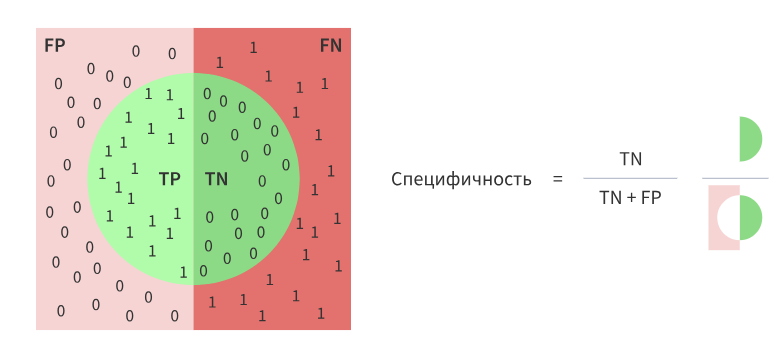

Очевидно, что если все отрицательные примеры классифицированы правильно (т.е. число ложноположительных случаев равно 0), то TPR=1.

Рассмотрим совместно TPR и TNR классификатора. TPR показывает, насколько хорошо модель классифицирует положительные примеры. Очевидно, что если все положительные примеры классифицированы правильно (т.е. число ложноотрицательных случаев равно 0), то TPR=1.

TNR показывает, насколько хорошо модель классифицирует отрицательные примеры. Очевидно, что если все отрицательные примеры классифицированы правильно (т.е. число ложноположительных случаев равно 0), то TPR=1.

Таким образом, по отдельности TPR и TNR характеризуют способность модели распознавать только один из классов. Но их совместное использование помогает создать метрику, которая позволяет выбирать значение дискриминационного порога, который оптимально балансирует модель между способностью распознавать положительные и отрицательные примеры. Именно эта задача и решается с помощью ROC-кривой.

Действительно, если изменять дискриминационный порог от 0 до 1 и наносить по оси абсцисс точки 1−TNR, а по оси ординат TPR, то полученный график и будет ROC-кривой. Величину 1−TNR называют долей ложноположительных классификаций (false positive rate) или показателем ложной тревоги. Она вычисляется следующим образом: 1−TNR=FPR=FP+TN При пороге, равном 1, все примеры будут классифицированы как отрицательные (FPR=1, TPR=1), а при пороге, равном 0, — как положительные ( FPR=0, TPR=0). Поэтому ROC-кривая всегда идет от точки (0,0) до точки (1,1).

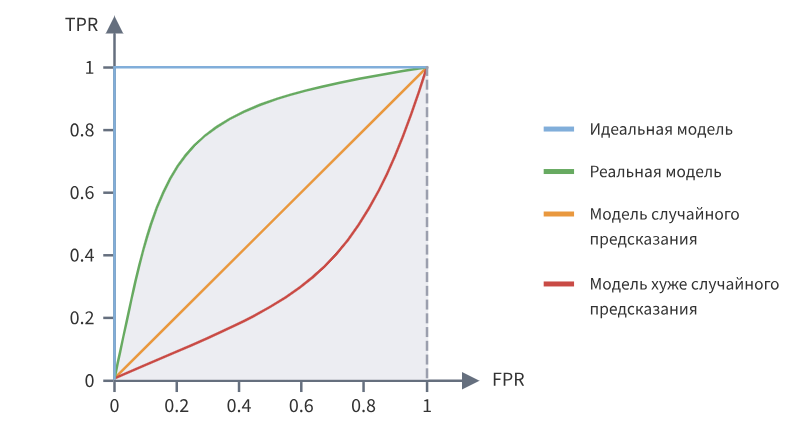

Несложно увидеть, что для идеальной модели ROC-кривая превращается в ломаную, проходящую через точки (0,0), (0,1) и (1,1). При этом площадь под ROC-кривой (AUC — Area Under Curve) окажется равной 1. Площадь под кривой выделена на рисунке светло-серым цветом.

Точка (0,1) соответствует идеальному состоянию модели, в котором и TPR, и TNR одновременно равны 1. Т.е. модель одинаково хорошо «научилась» работать как с положительными, так и с отрицательными примерами при существующем в обучающей выборке балансе классов.

Идеальная модель является скорее гипотетической и на практике, как правило, недостижима. Поэтому обычно приходится иметь дело с ROC-кривыми, которые не проходят через точку (0,1), а приближаются к ней на определенное расстояние. Соответственно и AUC−ROC оказывается меньше 1.

Таким образом, показатель AUC−ROC является удобной мерой качества классификатора относительно идеального. Принята следующая шкала оценки качества.

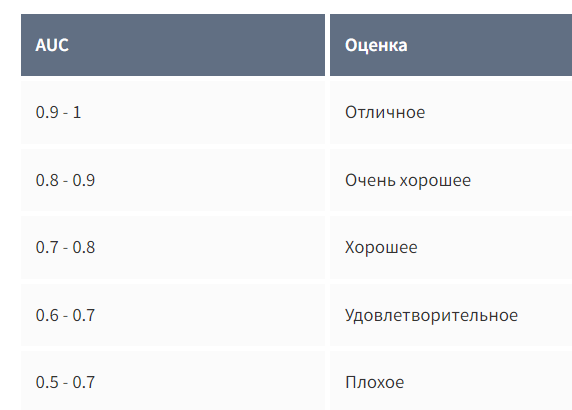

Если AUC−ROC=0.5, то ROC-кривая превращается в линию, проходящую через точки (0,0) и (1,1), которая соответствует бесполезному классификатору, работающему как случайный предсказатель. Если AUC−ROC<0.5, то получается модель, которая работает хуже случайного предсказателя и от ее использования следует отказаться

In [120]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

C:\Users\dinislam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [121]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

C:\Users\dinislam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [122]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_predict, average='macro')

np.float64(0.5)

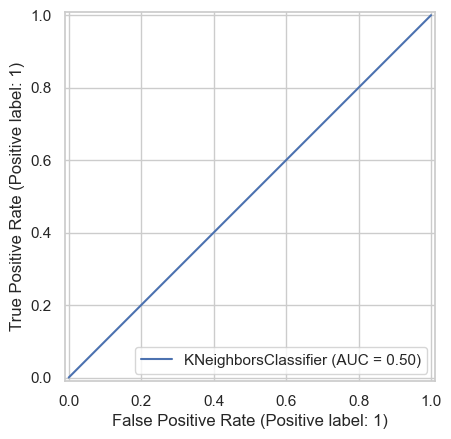

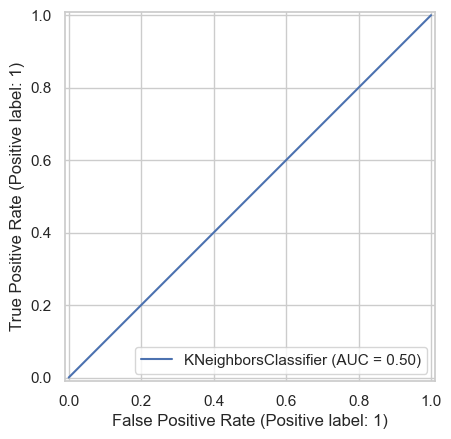

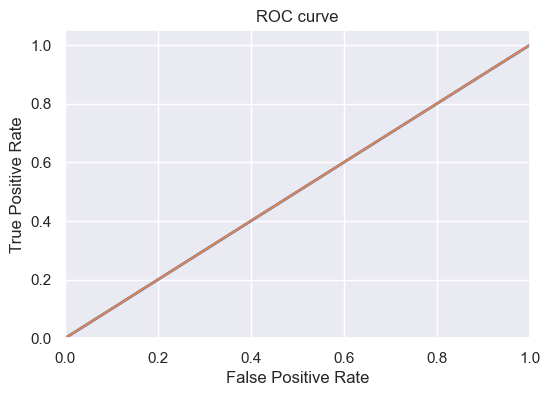

In [123]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Один из способов сравнения классификаторов предусматривает измере­ние площади под кривой (англ. Area Under the Curve — AUC). Безупречный клас­сификатор будет иметь площадь под ROC-кривой (ROC-AUC), равную 1, тогда как чисто случайный классификатор - площадь 0.5.

### Сравнение метрик
Подведем итоги, кратко резюмируя преимущества и недостатки рассмотренных мер качества классификационных моделей.

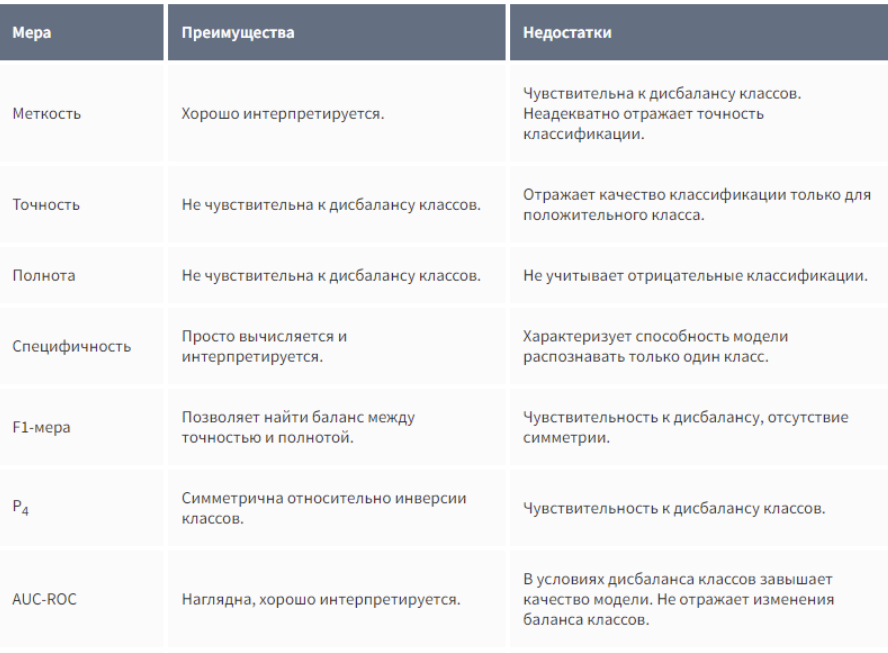